# Init

In [30]:
from fastai.vision.all import *
from fastai.vision.widgets import *


def is_file_cat(f):
    return f.name[0].isupper()

# Get data

In [25]:
path = untar_data(URLs.PETS)
images = path / "images"

# Load data

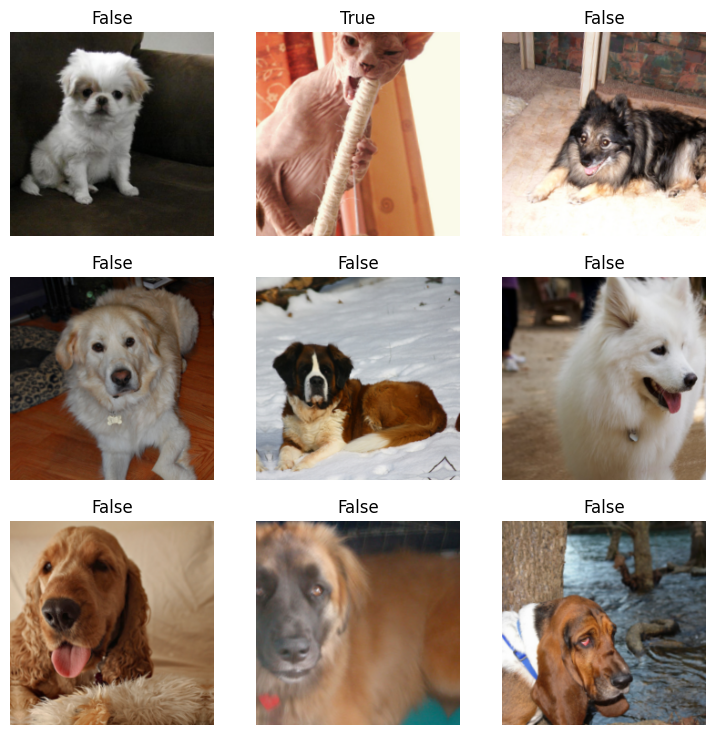

In [31]:
# Create the data loaders
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=55),
    get_y=is_file_cat,
    item_tfms=Resize(224, method="Squish"),
    batch_tfms=aug_transforms(),
)
dls = data_block.dataloaders(images)
dls.show_batch()

In [37]:
# Without finding a good learning rate and using the default
default_learn = vision_learner(dls, resnet18, metrics=error_rate)
default_learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.192647,0.028475,0.011502,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.057302,0.024235,0.008119,00:18
1,0.051523,0.033174,0.008796,00:18
2,0.042598,0.006823,0.002706,00:18
3,0.021434,0.005045,0.001353,00:19
4,0.013641,0.006408,0.003383,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.015206,0.005131,0.002030,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.012726,0.003385,0.000677,00:18
1,0.016311,0.007617,0.003383,00:19
2,0.011232,0.007176,0.002706,00:18
3,0.012321,0.004941,0.001353,00:18
4,0.006642,0.006215,0.002030,00:19


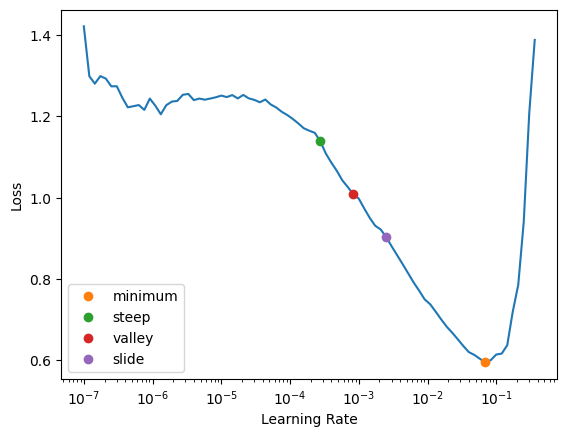

In [41]:
# Find a good learning rate first
rate_learn = vision_learner(dls, resnet18, metrics=error_rate)
lr = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

default_learn.fine_tune(5, base_lr=lr.valley)